<a href="https://colab.research.google.com/github/hawkilol/simDisc/blob/main/prova_discreta1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alunos
___
- ALFREDO GABRIEL DE SOUSA OLIVEIRA, 202004940020

- BRUNO EIKI NISHIMURA, 202004940017

- KALIL SALDANHA KALIFFE, 202004940030

- MARCUS MACIEL OLIVEIRA, 202004940003

In [ ]:
from typing import List, Tuple, Set, Dict

In [ ]:
import pandas as pd
import math
from matplotlib import pyplot as plt

In [ ]:
import statistics as st

In [ ]:
!pip install sinpy pandas matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sinpy: filename=sinpy-1.0-py3-none-any.whl size=2144 sha256=3fa87fe075263296709bf7fd9c5fa1e11fdaa18afd71fe8be0f85acc3d6504c2
  Stored in directory: /root/.cache/pip/wheels/b8/5e/1a/58da4d2d46d53935bbef7a60a791ff0a9aa253b90e6418b04e
Successfully built sinpy


In [ ]:
import sinpy

In [ ]:
import scipy
from scipy.stats import norm
from scipy.stats import lognorm

In [ ]:
def numeroDeClasses(dados):
    return round(1+3.3 * math.log10(len(dados)))

In [ ]:
# Remover outlier

def removeOut(dados):
    quartils = st.quantiles(dados)
    semOut = []
    A = quartils[2] -  quartils[0]
    for k in dados:
        tmp = True
        #if(k < quartils[0] - 1.5 * A or k > quartils[2] + 1.5 * A):
        #    print(k)
        #    tmp = False
        #    dados.remove(k)
        if((k < quartils[0] - 3* A or k > quartils[2] + 3 * A) and tmp):
            print(k)
            dados.remove(k)



# PROVA
___
1) A partir do conjunto de dados utilizado como entrada na prova, **realize o tratamento de outliers extremos** e forneça os seguintes valores:

a) Qual a **amplitude interquartil**? (1,0)

b) Qual a **média**? (1,0)

c) Qual o **desvio padrão**? (1,0)

d) Aplique o **método KS para $\alpha$ = 0,05** e informe a **função de probabilidade** descrita por estes dados, destacando também: (3,5)

- o número de classes do histograma;

- o valor do D-crítico calculado na tabela do método KS;

- a maior diferença encontrada entre a frequência observada acumulada
normalizada e a frequência teórica acumulada normalizada.


> # Conjunto de dados utilizado como entrada na prova

In [ ]:
dadosIni = [64,67,94,89,119,70,81,104,89,61,93,79,84,
76,58,84,99,83,111,87,72,104,55,76,102,100,
88,86,75,89,92,67,99,86,116,60,46,110,104,
87,104,68,88,94,48,99,91,88,99,57,78,65,
74,82,79,115,71,54,114,93,96,60,111,104,114,
78,127,60,82,131,71,111,101,120,91,84,80,113,
87,104,81,134,71,112,74,66,69,83,90,79,98,
88,124,47,97,108,78,104,49,122,101,91,75,45,
91,89,88,78,84,102,72,78,92,116,79,103,65,
101,29,87,71,127,230,94,79,80,75,74,88,27,
50,86,87,77,114,95,77,87,96,101,78,105,58,
70,70,99,62,81,93,87,87,90,87,82,117,68,
72,118,95,127,106,88,81,109,104,108,114,96,94,
111,69,108,101,55,92,89,84,38,54,55,79,77,
127,79,49,62,104,88,59,84,126,54,101,79,79,
100,89,100,70,85,54,315]

> # Análise de Dados Gerais dos Dados incluindo Outliers

In [ ]:
st.quantiles(dadosIni)

[74.0, 87.0, 101.0]

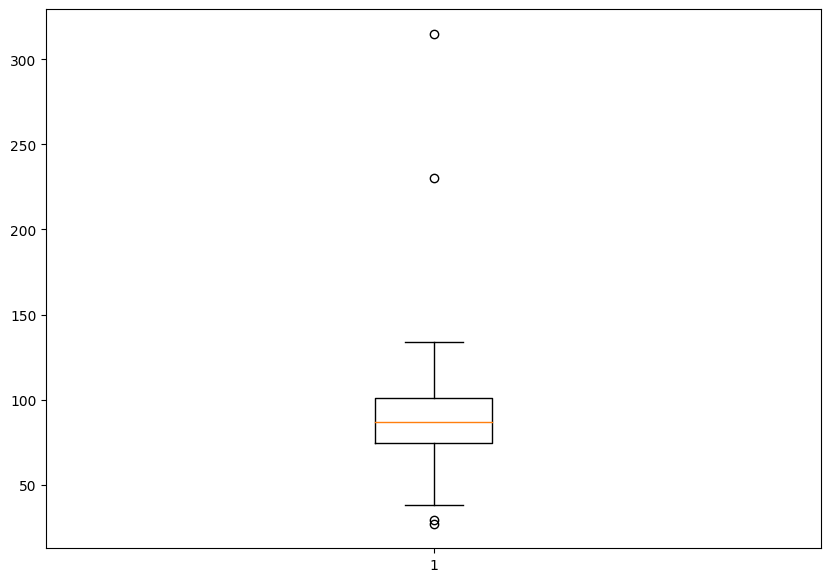

In [ ]:
plt.figure(figsize= (10,7))
plt.boxplot(dadosIni)
plt.show()

In [ ]:
numeroDeClasses(dadosIni)

9

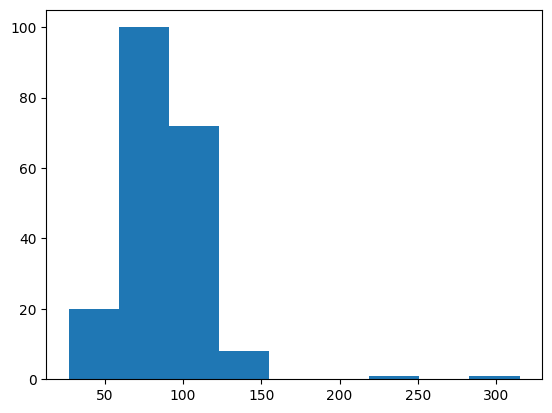

In [ ]:
plt.hist(dadosIni, bins=numeroDeClasses(dadosIni))
plt.show()

> # Análise de Dados Gerais dos Dados excluindo Outliers extremos

>> ## Valores Removidos

In [ ]:
dados_sem_out_ext = dadosIni
removeOut(dados_sem_out_ext)

230
315


>> ## Gráficos Gerais

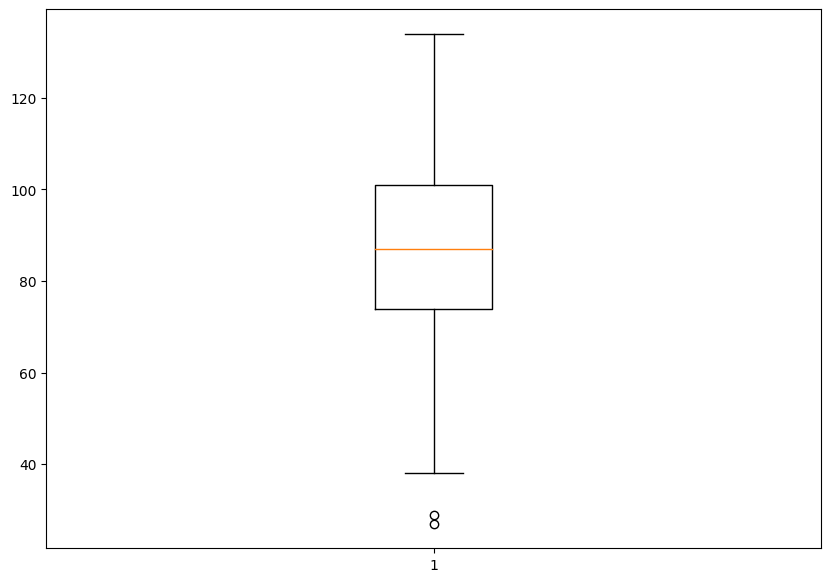

In [ ]:
plt.figure(figsize= (10,7))
plt.boxplot(dados_sem_out_ext)
plt.show()

>>> ### a) Qual a **amplitude interquartil**? (1,0)

>>>> ### Quartiles

In [ ]:
st.quantiles(dados_sem_out_ext)

[74.0, 87.0, 101.0]

>>>> ### Amplitude Interquatil

In [ ]:
provaQuantil = st.quantiles(dados_sem_out_ext)
provaAmpInterQuantil = provaQuantil[2] - provaQuantil[0]
provaAmpInterQuantil

27.0

>>> ### b) Qual a **média**? (1,0)


In [ ]:
media = st.mean(dados_sem_out_ext)
media

86.32

>>> ### c) Qual o desvio padrão? (1,0)

In [ ]:
st.stdev(dados_sem_out_ext)

20.343225756277057

>>>  ###  Destaque o número de classes do histograma;


In [ ]:
numeroDeClasses(dados_sem_out_ext)

9

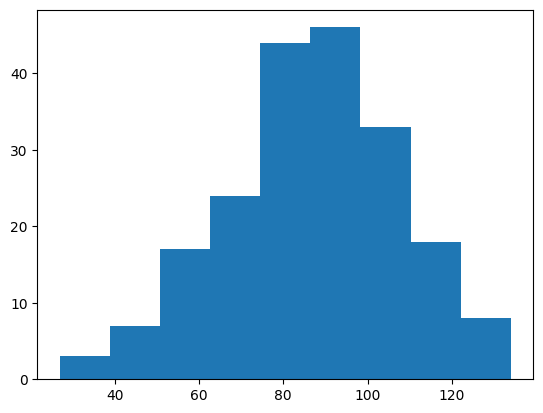

In [ ]:
plt.hist(dados_sem_out_ext, bins=numeroDeClasses(dados_sem_out_ext))
plt.show()

#### Baseado no Histograma apresentado, deduz-se visualmente que a função de probabilidade utilizada é a **DISTRIBUIÇÃO NORMAL**.

## Teste de Aderência (Kolmogorov-Smirnov)


In [ ]:
df = pd.DataFrame([], columns=["valorObservado", "frequenciaObservada", "frequenciaAcumuladaObservada", "frequenciaAcumuladaObservadaNormalizada"])

In [ ]:
count = [0 for k in range(max(dados_sem_out_ext) + 1)]

In [ ]:
for i in dados_sem_out_ext:
    count[i] += 1

In [ ]:
count

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 0,
 0,
 4,
 3,
 0,
 1,
 2,
 1,
 3,
 1,
 2,
 0,
 1,
 2,
 1,
 2,
 2,
 2,
 4,
 4,
 3,
 0,
 3,
 3,
 2,
 3,
 6,
 9,
 2,
 4,
 3,
 2,
 6,
 1,
 3,
 9,
 8,
 6,
 2,
 4,
 3,
 3,
 4,
 2,
 3,
 1,
 1,
 5,
 3,
 6,
 2,
 1,
 9,
 1,
 1,
 0,
 3,
 1,
 1,
 4,
 1,
 1,
 4,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 4,
 0,
 0,
 0,
 1,
 0,
 0,
 1]

In [ ]:
dadosUniqCount = ({i:0 for i in range(min(dados_sem_out_ext), max(dados_sem_out_ext) + 1)})
for key in dadosUniqCount.keys():
    dadosUniqCount[key] = count[key]

In [ ]:
dadosUniqCount= dict(sorted(dadosUniqCount.items()))
dadosUniqCount

{27: 1,
 28: 0,
 29: 1,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 1,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 1,
 46: 1,
 47: 1,
 48: 1,
 49: 2,
 50: 1,
 51: 0,
 52: 0,
 53: 0,
 54: 4,
 55: 3,
 56: 0,
 57: 1,
 58: 2,
 59: 1,
 60: 3,
 61: 1,
 62: 2,
 63: 0,
 64: 1,
 65: 2,
 66: 1,
 67: 2,
 68: 2,
 69: 2,
 70: 4,
 71: 4,
 72: 3,
 73: 0,
 74: 3,
 75: 3,
 76: 2,
 77: 3,
 78: 6,
 79: 9,
 80: 2,
 81: 4,
 82: 3,
 83: 2,
 84: 6,
 85: 1,
 86: 3,
 87: 9,
 88: 8,
 89: 6,
 90: 2,
 91: 4,
 92: 3,
 93: 3,
 94: 4,
 95: 2,
 96: 3,
 97: 1,
 98: 1,
 99: 5,
 100: 3,
 101: 6,
 102: 2,
 103: 1,
 104: 9,
 105: 1,
 106: 1,
 107: 0,
 108: 3,
 109: 1,
 110: 1,
 111: 4,
 112: 1,
 113: 1,
 114: 4,
 115: 1,
 116: 2,
 117: 1,
 118: 1,
 119: 1,
 120: 1,
 121: 0,
 122: 1,
 123: 0,
 124: 1,
 125: 0,
 126: 1,
 127: 4,
 128: 0,
 129: 0,
 130: 0,
 131: 1,
 132: 0,
 133: 0,
 134: 1}

In [ ]:
df.valorObservado = list(dadosUniqCount.keys())
df.frequenciaObservada = list(dadosUniqCount.values())

In [ ]:
df.frequenciaAcumuladaObservada = 0
frequenciaAOb = df.frequenciaAcumuladaObservada.to_list()

In [ ]:
print(frequenciaAOb)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
for i in range(len(df)):
    if(i == 0):
        frequenciaAOb[i] = df.frequenciaObservada[0]
    else:
        frequenciaAOb[i] = (df.frequenciaObservada[i] + frequenciaAOb[i - 1])

In [ ]:
df.frequenciaAcumuladaObservada = frequenciaAOb

In [ ]:
df.frequenciaAcumuladaObservadaNormalizada = df.frequenciaAcumuladaObservada / df.frequenciaAcumuladaObservada.max()

In [ ]:
dados_norm_to_plot = norm.cdf(df.valorObservado, loc=media, scale=st.stdev(dados_sem_out_ext))

In [ ]:
dados_norm_to_plot

array([0.00177299, 0.00207321, 0.00241886, 0.00281584, 0.00327069,
       0.00379057, 0.00438336, 0.00505764, 0.00582277, 0.00668889,
       0.00766697, 0.00876882, 0.0100071 , 0.01139535, 0.01294797,
       0.01468024, 0.01660828, 0.01874904, 0.02112025, 0.02374037,
       0.02662856, 0.02980456, 0.03328862, 0.0371014 , 0.04126384,
       0.04579705, 0.05072215, 0.05606009, 0.06183152, 0.0680566 ,
       0.07475477, 0.0819446 , 0.08964357, 0.09786781, 0.10663199,
       0.115949  , 0.12582983, 0.1362833 , 0.14731591, 0.15893167,
       0.17113187, 0.18391502, 0.19727663, 0.2112092 , 0.22570205,
       0.24074135, 0.25631004, 0.27238788, 0.28895143, 0.30597421,
       0.32342673, 0.34127667, 0.35948903, 0.37802631, 0.3968488 ,
       0.41591477, 0.43518076, 0.4546019 , 0.4741322 , 0.49372488,
       0.51333271, 0.53290835, 0.55240471, 0.57177524, 0.59097432,
       0.60995756, 0.62868209, 0.64710686, 0.66519294, 0.6829037 ,
       0.7002051 , 0.7170658 , 0.73345739, 0.74935446, 0.76473

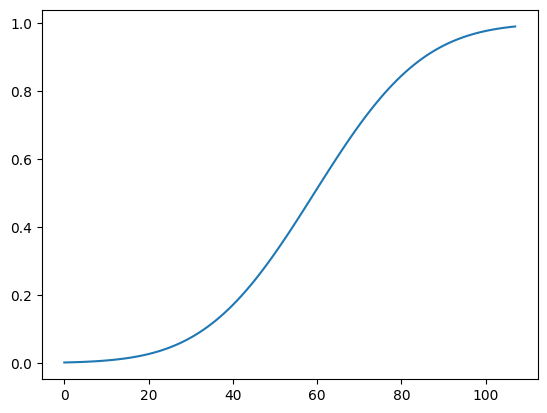

In [ ]:
plt.plot(dados_norm_to_plot)
plt.show()

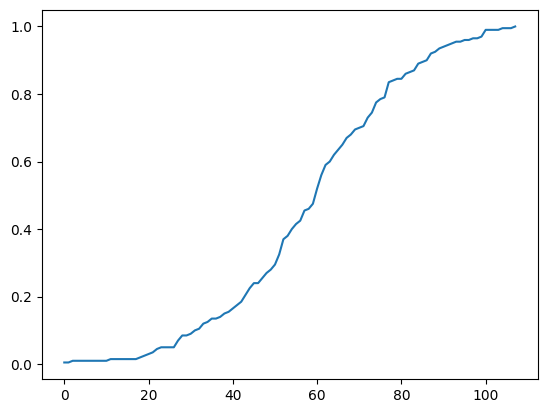

In [ ]:
plt.plot(df['frequenciaAcumuladaObservadaNormalizada'].to_numpy())
plt.show()

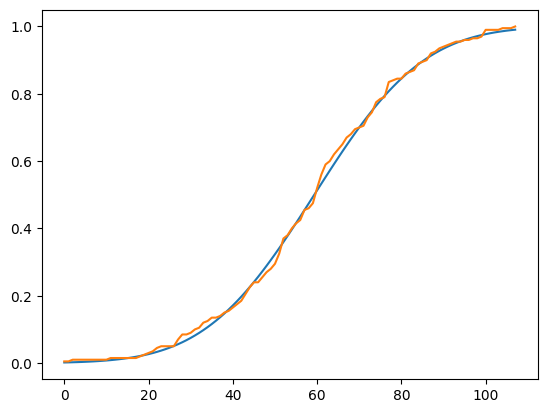

In [ ]:
plt.plot(dados_norm_to_plot)
plt.plot(df['frequenciaAcumuladaObservadaNormalizada'].to_numpy())
plt.show()

In [ ]:
len(df['frequenciaAcumuladaObservadaNormalizada'])

108

In [ ]:
scipy.stats.norm.cdf(df.valorObservado, loc=0, scale=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [ ]:
df["frequenciaAcumuladaTeoricaNo"] = norm.cdf(df.valorObservado, loc=media, scale=st.stdev(dados_sem_out_ext))

In [ ]:
df

,valorObservado,frequenciaObservada,frequenciaAcumuladaObservada,frequenciaAcumuladaObservadaNormalizada,frequenciaAcumuladaTeoricaNo
0,27,1,1,0.005,0.001773
1,28,0,1,0.005,0.002073
2,29,1,2,0.010,0.002419
3,30,0,2,0.010,0.002816
4,31,0,2,0.010,0.003271
...,...,...,...,...,...
103,130,0,198,0.990,0.984109
104,131,1,199,0.995,0.985965
105,132,0,199,0.995,0.987631
106,133,0,199,0.995,0.989123


# Tabela KS

#### A função de probabilidade descrita por estes dados é a da **Distribuição Normal**

Foi utilizada a implementada pelo scipy

In [ ]:
df['D'] = abs(df.frequenciaAcumuladaTeoricaNo - df.frequenciaAcumuladaObservadaNormalizada)
df

,valorObservado,frequenciaObservada,frequenciaAcumuladaObservada,frequenciaAcumuladaObservadaNormalizada,frequenciaAcumuladaTeoricaNo,D
0,27,1,1,0.005,0.001773,0.003227
1,28,0,1,0.005,0.002073,0.002927
2,29,1,2,0.010,0.002419,0.007581
3,30,0,2,0.010,0.002816,0.007184
4,31,0,2,0.010,0.003271,0.006729
...,...,...,...,...,...,...
103,130,0,198,0.990,0.984109,0.005891
104,131,1,199,0.995,0.985965,0.009035
105,132,0,199,0.995,0.987631,0.007369
106,133,0,199,0.995,0.989123,0.005877


>>>  ###  Destaque o valor do D-crítico calculado na tabela do método KS;


In [ ]:
D_critico = ((1.36) / (len(dados_sem_out_ext) ** 0.5))
D_critico

0.09616652224137047

>>>  ### Destaque a maior diferença encontrada entre a frequência observada acumulada normalizada e a frequência teórica acumulada normalizada.

In [ ]:
max(df.D)


0.037595294870595874

>>> ### Informe a função de probabilidade descrita por estes dados

In [ ]:
if D_critico > max(df.D):
  print("MÉTODO KS GARANTE A DISTRIBUIÇÃO NORMAL")
else:
  print("MÉTODO KS NÃO GARANTE A DISTRIBUIÇÃO NORMAL")

MÉTODO KS GARANTE A DISTRIBUIÇÃO NORMAL


2) Realize a modelagem ACD integrada da seguinte descrição de um sistema. Modele levando
em conta apenas o que está descrito. Em seguida, simule utilizando o método das 3 fases com
os dados informados na descrição. (3,5)

 > Uma biblioteca dispõe de 2 funcionários para atendimento ao público. O tipo de
  atendimento que esses funcionários realizam é ouvir o pedido do usuário, buscar
  um livro na prateleira, e trazê-lo ao solicitante – essas operações são tratadas como
  uma só. Em uma determinada tarde, 6 usuários chegaram a biblioteca nos tempos
  3, 5, 7, 7, 9 e 11 respectivamente. Os tempos totais de serviço (conversa + busca + retorno do livro) que cada um desses clientes demandou foi de 5, 2, 2, 4, 2 e 3
  respectivamente.

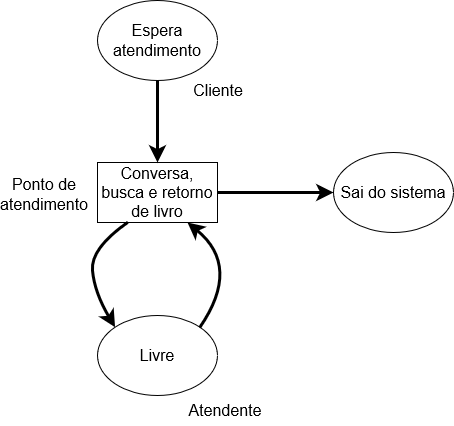

| Tempo Término mais cedo |          Atividade Finalizada          |   Início da atividade e Previsão de Término  |
|:-----------------------:|:--------------------------------------:|:--------------------------------------------:|
|            3            |                C1 chega                |  ATENDIMENTO C1 inicia em 3 e finaliza em 8  |
|            5            |                C2 chega                |  ATENDIMENTO C2 inicia em 5 e finaliza em 7  |
|            7            | C3 e C4 chega, ATENDIMENTO C2 finaliza |  ATENDIMENTO C3 inicia em 7 e finaliza em 9  |
|            8            |         ATENDIMENTO C1 finaliza        |  ATENDIMENTO C4 inicia em 8 e finaliza em 12 |
|            9            |    C5 chega, ATENDIMENTO C3 finaliza   |  ATENDIMENTO C5 inicia em 9 e finaliza em 11 |
|            11           |    C6 chega, ATENDIMENTO C5 finaliza   | ATENDIMENTO C6 inicia em 11 e finaliza em 14 |
|            12           |         ATENDIMENTO C4 finaliza        |                      ---                     |
|            14           |         ATENDIMENTO C6 finaliza        |                      ---                     |
